# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

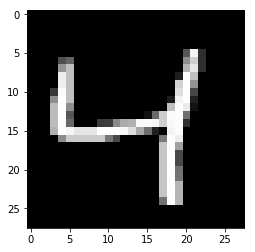

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6945
Epoch: 1/20... Training loss: 0.6912
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6848
Epoch: 1/20... Training loss: 0.6818
Epoch: 1/20... Training loss: 0.6763
Epoch: 1/20... Training loss: 0.6702
Epoch: 1/20... Training loss: 0.6645
Epoch: 1/20... Training loss: 0.6560
Epoch: 1/20... Training loss: 0.6472
Epoch: 1/20... Training loss: 0.6362
Epoch: 1/20... Training loss: 0.6253
Epoch: 1/20... Training loss: 0.6119
Epoch: 1/20... Training loss: 0.6019
Epoch: 1/20... Training loss: 0.5860
Epoch: 1/20... Training loss: 0.5698
Epoch: 1/20... Training loss: 0.5551
Epoch: 1/20... Training loss: 0.5366
Epoch: 1/20... Training loss: 0.5223
Epoch: 1/20... Training loss: 0.5042
Epoch: 1/20... Training loss: 0.4888
Epoch: 1/20... Training loss: 0.4697
Epoch: 1/20... Training loss: 0.4494
Epoch: 1/20... Training loss: 0.4359
Epoch: 1/20... Training loss: 0.4212
Epoch: 1/20... Training loss: 0.4109
Epoch: 1/20... Training loss: 0.3913
E

Epoch: 2/20... Training loss: 0.1757
Epoch: 2/20... Training loss: 0.1832
Epoch: 2/20... Training loss: 0.1788
Epoch: 2/20... Training loss: 0.1760
Epoch: 2/20... Training loss: 0.1805
Epoch: 2/20... Training loss: 0.1733
Epoch: 2/20... Training loss: 0.1730
Epoch: 2/20... Training loss: 0.1814
Epoch: 2/20... Training loss: 0.1763
Epoch: 2/20... Training loss: 0.1784
Epoch: 2/20... Training loss: 0.1804
Epoch: 2/20... Training loss: 0.1793
Epoch: 2/20... Training loss: 0.1747
Epoch: 2/20... Training loss: 0.1767
Epoch: 2/20... Training loss: 0.1757
Epoch: 2/20... Training loss: 0.1712
Epoch: 2/20... Training loss: 0.1765
Epoch: 2/20... Training loss: 0.1784
Epoch: 2/20... Training loss: 0.1740
Epoch: 2/20... Training loss: 0.1780
Epoch: 2/20... Training loss: 0.1729
Epoch: 2/20... Training loss: 0.1714
Epoch: 2/20... Training loss: 0.1778
Epoch: 2/20... Training loss: 0.1794
Epoch: 2/20... Training loss: 0.1732
Epoch: 2/20... Training loss: 0.1747
Epoch: 2/20... Training loss: 0.1731
E

Epoch: 3/20... Training loss: 0.1456
Epoch: 3/20... Training loss: 0.1460
Epoch: 3/20... Training loss: 0.1460
Epoch: 3/20... Training loss: 0.1491
Epoch: 3/20... Training loss: 0.1468
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1453
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1502
Epoch: 3/20... Training loss: 0.1489
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1488
Epoch: 3/20... Training loss: 0.1448
Epoch: 3/20... Training loss: 0.1464
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1423
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1464
E

Epoch: 3/20... Training loss: 0.1277
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1265
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1282
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1234
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1221
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1279
E

Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1122
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1108
E

Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1085
E

Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.0995
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1040
E

Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1020
E

Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0934
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0981
E

Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0960
E

Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0905
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0900
Epoch: 10/20... Training loss: 0.0915
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0885
Epoch: 12/20... Training loss: 0.0900
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0984
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

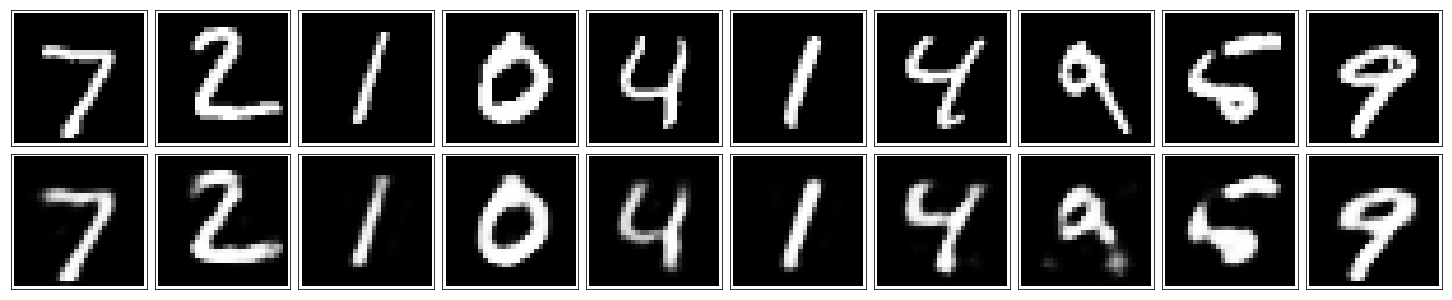

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.